In [48]:
import pandas as pd
import numpy as np
data = pd.read_csv("raw_data.csv")
series_col = "Close_2330.TW(today)"
exog_cols = [col for col in data.columns if col!=series_col and col!="Date"]
print(exog_cols)
y = data[series_col]
x = data[exog_cols]
test_size = int(0.1*len(data))
y_train = y[:-test_size]
y_test = y[-test_size:]
x_train = x[:-test_size]
x_test = x[-test_size:]

['High_2330.TW(today)', 'Low_2330.TW(today)', 'Open_2330.TW(today)', 'Volume_2330.TW(today)', 'Close_NVDA(today)', 'High_NVDA(today)', 'Low_NVDA(today)', 'Open_NVDA(today)', 'Volume_NVDA(today)', 'Close_AMD(today)', 'High_AMD(today)', 'Low_AMD(today)', 'Open_AMD(today)', 'Volume_AMD(today)', 'is_weekend', 'Close_2330.TW(tomorrow)']


In [ ]:
from skforecast.recursive import ForecasterRecursive
from skforecast.preprocessing import RollingFeatures
from sklearn.linear_model import LinearRegression
forecaster = ForecasterRecursive(
                 regressor       = LinearRegression(),
                 lags            = 15,
                 window_features = RollingFeatures(stats=['mean'], window_sizes=10),
                 transformer_y   = None)

In [ ]:
from skforecast.model_selection import TimeSeriesFold, backtesting_forecaster
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import warnings
from skforecast.exceptions import DataTypeWarning
warnings.simplefilter('ignore', category=DataTypeWarning)
metrics = [
    # 'mean_absolute_error',
    'root_mean_squared_scaled_error',
    # 'mean_absolute_percentage_error',
    # 'mean_absolute_scaled_error'
]
tscv = TimeSeriesFold(
    steps=30,                 # predict 30 days at a time
    initial_train_size=365,   # start with 1 year of data
    refit=True,
    window_size=10
)
# print(validation_size, cv)
# backtest_metrics, predictions = backtesting_forecaster(
#                                     forecaster = forecaster,
#                                     y          = y_train,
#                                     cv         = tscv,
#                                     metric     = metrics,
#                                     exog=x_train)

Information of folds
--------------------
Number of observations used for initial training: 365
Number of observations used for backtesting: 3148
    Number of folds: 105
    Number skipped folds: 0 
    Number of steps per fold: 30
    Number of steps to exclude between last observed data (last window) and predictions (gap): 0
    Last fold only includes 28 observations.

Fold: 0
    Training:   0 -- 364  (n=365)
    Validation: 365 -- 394  (n=30)
Fold: 1
    Training:   30 -- 394  (n=365)
    Validation: 395 -- 424  (n=30)
Fold: 2
    Training:   60 -- 424  (n=365)
    Validation: 425 -- 454  (n=30)
Fold: 3
    Training:   90 -- 454  (n=365)
    Validation: 455 -- 484  (n=30)
Fold: 4
    Training:   120 -- 484  (n=365)
    Validation: 485 -- 514  (n=30)
Fold: 5
    Training:   150 -- 514  (n=365)
    Validation: 515 -- 544  (n=30)
Fold: 6
    Training:   180 -- 544  (n=365)
    Validation: 545 -- 574  (n=30)
Fold: 7
    Training:   210 -- 574  (n=365)
    Validation: 575 -- 604  (n=3

IndexError: positional indexers are out-of-bounds

In [53]:
backtest_metrics

,root_mean_squared_scaled_error
0,0.425458


In [ ]:
forecaster.fit(y_train, x_train)
predictions = forecaster.predict(steps=len(y_test), exog=x_test[exog_cols])

3513    947.147638
3514    951.456434
3515    952.528890
Name: pred, dtype: float64

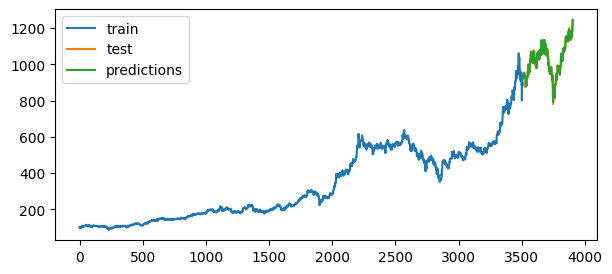

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 3))
y_train.plot(ax=ax, label='train')
y_test.plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend()

In [115]:
from sklearn.metrics import root_mean_squared_error
y_true = data_test[series_col].values
y_pred = predictions.values
error = root_mean_squared_error(y_true, y_pred)
print(error)

5.933721189022128
